In [3]:
import numpy as np
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")  #--to ignore warnings


# Q1. Problem statement
Delivery_time--> Predict delivery time using sorting time
Dataset: Delivery_time.CSV

In [4]:
# Loading dataset 
Data=pd.read_csv("C:/Users/MANISHA/Downloads/delivery_time.csv")
Data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
# Renaming the column as current column name includes space hence we would remove it

In [6]:
#rename the Delivery Time & Sorting Time column axis=1 perform it based on column 
Dataset = Data.rename({'Delivery Time': 'Delivery_Time','Sorting Time': 'Sorting_Time'}, axis=1)
Dataset.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [7]:
#Checking NA Values
Dataset.isnull().sum()

Delivery_Time    0
Sorting_Time     0
dtype: int64

In [8]:
# inference: No NA values found in the dataset

# Declare the X & Y variable
---> As we need to predict delivery time in this case so,
---> Y is target variable(Dependent) Delivery time
----> X is input variable(Independent) Sorting time

# Correlation

In [9]:
# using correlation
Dataset.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


In [10]:
# inference: it can be seen correlation between Delivery_time and Sorting_time is 0.82 which indicates positively strong correlation
# Also this prove Sorting_time is required to predict delivery_time

# Plotting-- Distribution

<AxesSubplot:xlabel='Delivery_Time', ylabel='Density'>

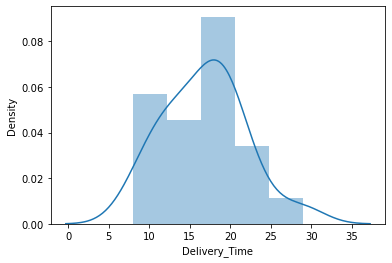

In [11]:
# Distribution plot for deliver_time feature
sns.distplot(Dataset['Delivery_Time'])

<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

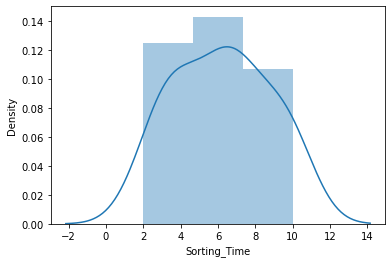

In [12]:
#Distribution Plot for Sorting_Time feature
sns.distplot(Dataset["Sorting_Time"])

# inference:
Delivery_time: Distribution is not normal for Delivery_time as it seems to be slightly bimodel on the right hand side.
               It has positive skewness
Sorting_time: It follows Normal distribution

In [13]:
# Model building--- Fitting a Linear Regression model
import statsmodels.formula.api as smf
model = smf.ols('Delivery_Time~Sorting_Time',data = Dataset).fit()

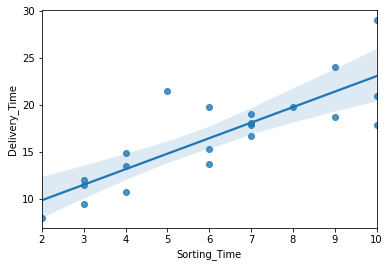

In [14]:
#Best Fit line
sns.regplot(x="Sorting_Time", y="Delivery_Time", data=Dataset);

In [15]:
#Coefficients
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

Inference: Intercept B0=6.5,Sorting_time is B1=1.64

In [16]:
#t and p-Values
print("T_values is: ","\n",model.tvalues,"\n","P_values is: ",'\n', model.pvalues)

T_values is:  
 Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 P_values is:  
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


# Hypothesis in SLR
B0 = Beta0 , B1 = Beta1

H0: B1 = 0, B1--> Slope is Zero Y is not Dependent

H1: B1 ≠ 0, B1--> Slope is not Zero Y is Dependent

In [17]:
#Hypothesis Test of SLR model
α = 0.05  # Standard

if model.pvalues[1] < α:
    print("p_value is:",model.pvalues[1],", Reject H0,Slope is not Zero and Y is Dependent")
else:
    print("p_value is:",model.pvalues[1],", Fail to Reject H0,Slope is Zero and Y is not Dependent")

p_value is: 3.983049566687784e-06 , Reject H0,Slope is not Zero and Y is Dependent


In [18]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

Inference: R_squared is 0.68 so the model is okay good model

Predict for new data point

In [19]:
#Predict for 12 and 15 Sorting_Time circulation
newdata=pd.DataFrame(np.array([12,15]),columns = ["Sorting_Time"])
newdata

,Sorting_Time
0,12
1,15


In [20]:
#Predicting 
model.predict(newdata)

0    26.370973
1    31.318032
dtype: float64

Inference:
For 12 Sorting_Time, Delivery_Time will be 26
For 15 Sorting_Time, Delivery_Time will be 31

In [ ]:
# Manually calculating and checking the regression equation of the model

In [21]:
# Y=B0+B1X
#B0=6.58-- from build model
#B1=1.64-- from build model
#X=15---   Datapoint to predict

Y=6.58+1.64*15
Y

31.18

Inference: Manually,also it gives the approx the same results as the Regression equation built by the Model

# Q2.Problem statement
Salary_hike--> Build a prediction model for Salary_hike
Dataset: Salary_Data.csv

In [24]:
# Loading the dataset
DataSet=pd.read_csv("C:/Users/MANISHA/Downloads/Salary_Data (2).csv")
DataSet.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [25]:
#Checking NA Values
DataSet.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

Inference: No NA values found in the DataSet.

# Declare the X & Y variable
---> As we need to predict salary_hike in this case so,
----> Y is salary(Dependent)
-----> X is Years of Experience(Independent)
------> Salary~ Years of Experience

Correlation
using corr()


In [26]:
DataSet.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


Inference:
As it can be seen correlation between years of experience and salary is 0.97 which indicates positively strong correlation
Also this proves that Years of experience is required to predict salary_hike

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

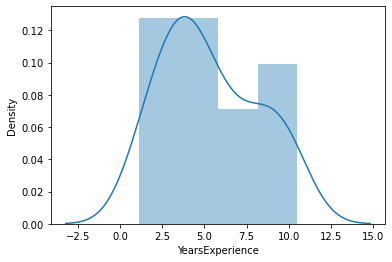

In [27]:
# Plotting Distribution
# Distribution plot for years of experience feature
sns.distplot(DataSet['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

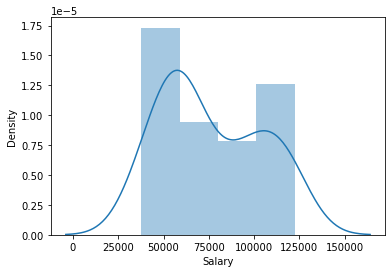

In [28]:
#Distribution Plot for Salary feature
sns.distplot(DataSet["Salary"])

Inference: YearsofExperience,salary: Distribution is not normal for both the features,it also seems to be slightly Bimodel on 
the right hand side and has positive skewness

# Model Building---Fitting a Linear Regression Model

In [30]:
#Building the model
import statsmodels.formula.api as smf
model = smf.ols('Salary~YearsExperience',data = DataSet).fit()

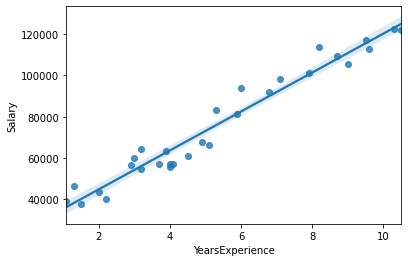

In [31]:
#Best Fit line
sns.regplot(x="YearsExperience", y="Salary", data=DataSet);

In [32]:
#Coefficients
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

# Inference:Intercept is B0=25792.2, YearsExperience is B1=9499.9

In [33]:
#t and p-Values
print("T_values is: ","\n",model.tvalues,"\n","P_values is: ",'\n', model.pvalues)

T_values is:  
 Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 P_values is:  
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


Hypothesis in SLR
B0=Beta0,B1=Beta1
Ho:B1=0,B1---> slope is zero Y is not Dependent
H1:B1≠ 0, B1--> Slope is not Zero Y is Dependent

In [34]:
#Hypothesis Test of SLR model
α = 0.05  # Standard

if model.pvalues[1] < α:
    print("p_value is:",model.pvalues[1],", Reject H0,Slope is not Zero and Y is Dependent")
else:
    print("p_value is:",model.pvalues[1],", Fail to Reject H0,Slope is Zero and Y is not Dependent")

p_value is: 1.1430681092271397e-20 , Reject H0,Slope is not Zero and Y is Dependent


In [35]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

Inference: R_squared is 0.95 so the model is a very Good model

# Predict for new data point


In [36]:
#Predict for 200 and 300 daily circulation
newdata=pd.DataFrame(np.array([12.0,14.5]),columns = ["YearsExperience"])
newdata

,YearsExperience
0,12.0
1,14.5


In [37]:
#Predicting 
model.predict(newdata)

0    139191.748056
1    162816.653860
dtype: float64

Inference:
For 12.0 YearsExperience, Salary_hike will be 139191.74

For 14.6 YearsExperience, Salary_hike will be 162816.65

# Manually Calculating and Checking the regression equation of the model 

In [38]:
# Y = B0 + B1X

#B0 = 25792.2 - from Build model
#B1 = 9449.96 - from Build model
#X = 14.5   - Datapoint to Predict

Y = 25792.2 + 9449.96*14.5
Y

162816.62

Inference:

Manually Also Its gives the approx the Same results as the Regression equation built by the Model